# Stochastic Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats.qmc as qmc

In [2]:
# Set global variables
X_MIN = -2
X_MAX = 0.5
Y_MIN = -1
Y_MAX = 1
TOTAL_AREA = (X_MAX - X_MIN) * (Y_MAX - Y_MIN)

## Question 1

In [59]:
def mandelbrot(c, iterations) -> bool:
    """
    Checks whether a value is part of the Mandelbrot set and returns a True
    of False value.
    """
    z = complex(0)

    # Go through iterations and check whether the value is in the set.
    for i in range(iterations):
        if abs(z) > 2:
            return False

        # Compute next iteration
        z = z ** 2 + c

    # Value is in the set after the number of iterations.
    return True

In [5]:
# Check Mandelbrot iteration
assert mandelbrot(-1, 1000) == True
assert mandelbrot(-2, 1000) == True
assert mandelbrot(0.25, 1000) == True
assert mandelbrot(1, 1000) == False
assert mandelbrot(0.26, 10) == True

In [6]:
def linear_points(sample_size, x_min, x_max, y_min, y_max) -> list:
    """
    Generates evenly spaced points.
    """
    return (np.linspace(x_min, x_max, sample_size)[np.newaxis,:]
        + np.linspace(y_min, y_max, sample_size)[:,np.newaxis] * 1j)

In [8]:
complex_plane = linear_points(1000, X_MIN, X_MAX, Y_MIN, Y_MAX)

True

In [61]:
def plot_values(sample, iterations) -> float:
    """
    This function checks for every point in the sample whether it is part of
    the Mandelbrot set. Then is sums al the true values and divide it by the
    total points to get the percentage of points in the set.
    """

    m = len(sample)
    n = len(sample[0])

    result = np.zeros((n,m), dtype=bool)
    true_count = 0

    # Go through the sample and check for each point if it is in the set.
    for i in range(0,m):
        for j in range(0,n):
            result[i][j] = mandelbrot(sample[i][j], iterations)
    return result

In [64]:
plot_values(complex_plane, 1)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [75]:
def plot_image(complex_plane) -> None:

    extent = X_MIN, X_MAX, Y_MIN, Y_MAX
    fig = plt.figure(frameon=False)
    im1 = plt.imshow(plot_values(complex_plane, 2), cmap='Greens',  extent=extent)
    im2 = plt.imshow(plot_values(complex_plane, 10), cmap='Reds', alpha=0.6,  extent=extent)
    im3 = plt.imshow(plot_values(complex_plane, 100), cmap='Blues', alpha=0.8, extent=extent)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.show()

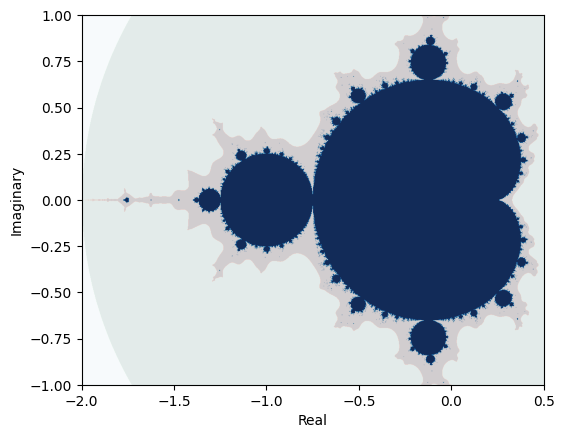

In [76]:
plot_image(complex_plane)

## Question 2

In [41]:
def sample_test(sample, iterations) -> float:
    """
    This function checks for every point in the sample whether it is part of
    the Mandelbrot set. Then is sums al the true values and divide it by the
    total points to get the percentage of points in the set.
    """

    m = len(sample)
    n = len(sample[0])

    result = np.zeros((n,m), dtype=bool)
    true_count = 0

    # Go through the sample and check for each point if it is in the set.
    for i in range(0,m):
        for j in range(0,n):
            result[i][j] = mandelbrot(sample[i][j], iterations)

        # Sum the number of values in the set.
        true_count += sum(result[i])

    # Return the estimated area of the Mandelbrot set.
    return true_count / (m * n) * TOTAL_AREA

In [45]:
# Values from paper of Fisher and Hill (1993)
assert 1.37 <= sample_test(complex_plane, 1000) <= 1.68

### Analysis

In [93]:
sample_sizes = [10, 100, 500, 1000]
iterations = [10, 100, 500, 1000]
test_iterations = 10

In [91]:
def normal_random_sample(no_samples):
    x = np.random.uniform(X_MIN, X_MAX, no_samples)
    y = np.random.uniform(Y_MIN, Y_MAX, no_samples)
    return x[np.newaxis,:] + y[:,np.newaxis] * 1j

In [94]:
def test_iterations(no_samples, test_iterations, iterations):
    mean = list()
    stdev = list()

    # Go through every iteration.
    for i in iterations:

        # Calculate the result for every iteration multiple times.
        results = list()
        plane = normal_random_sample(no_samples)
        results = [sample_test(plane, i) for j in range(test_iterations)]
        mean.append(np.mean(results))
        stdev.append(np.std(results))

    # Return the mean and standard deviation for every iteration
    return mean, stdev


In [99]:
iter_mean, iter_stdev = test_iterations(500, 10, [10, 100])

In [102]:
iter_mean

[2.08275, 1.5439000000000003]

In [103]:
iter_stdev

[0.0, 2.220446049250313e-16]